In [1]:
### Passo 1: Carregamento e visualização da base de dados

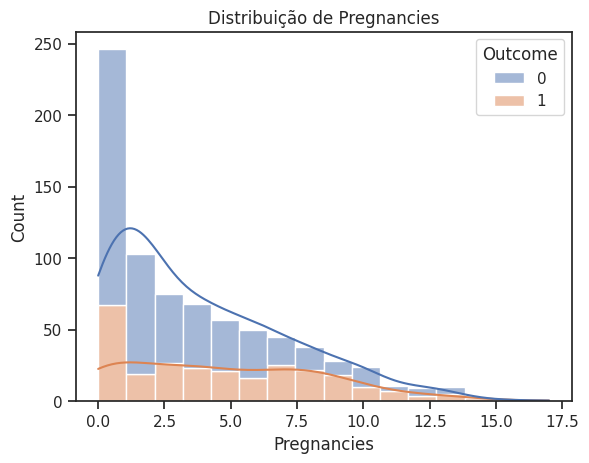

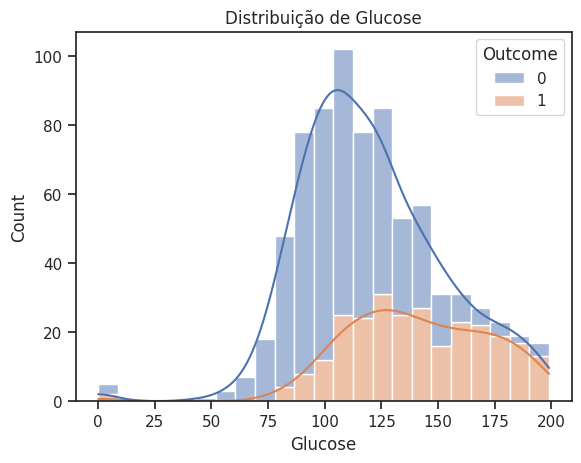

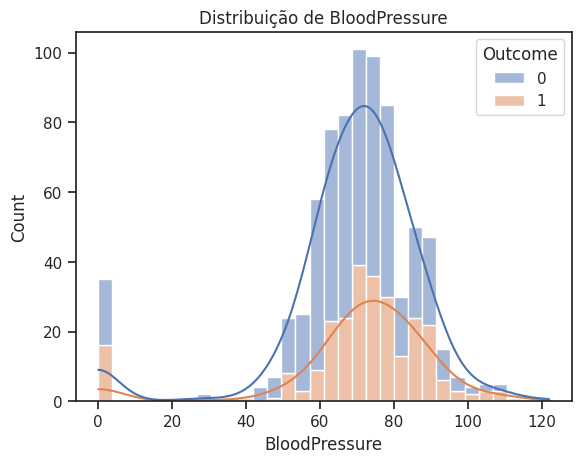

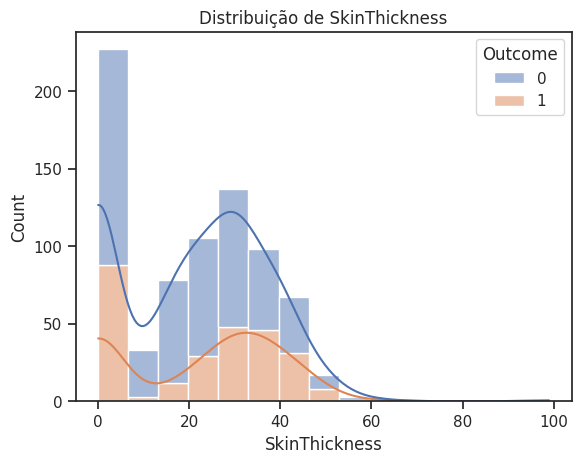

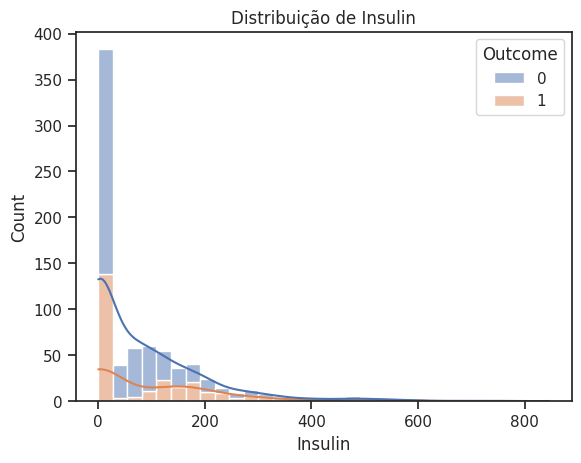

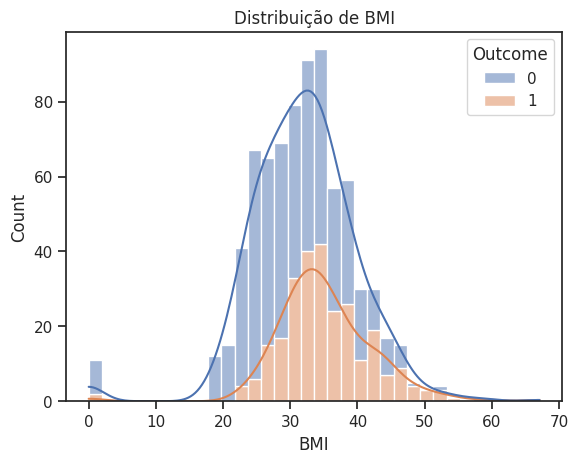

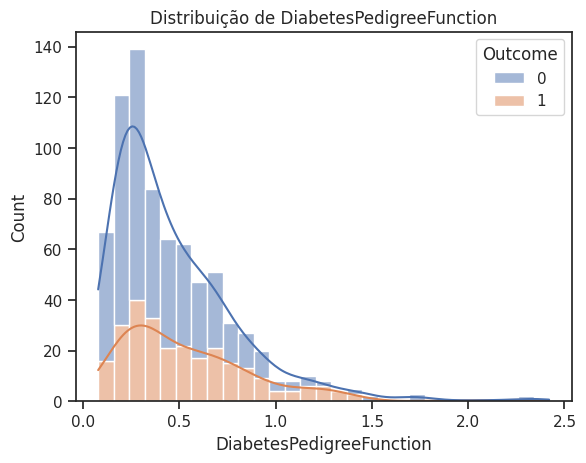

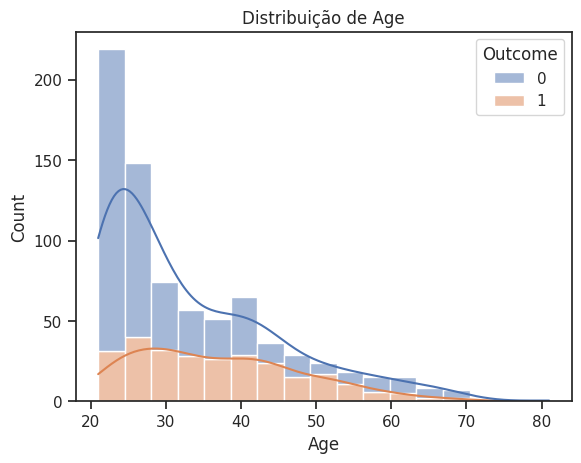

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


df = pd.read_csv("diabetes.csv")

sns.set(style="ticks")

numeric_columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

for column in numeric_columns:
    sns.histplot(data=df, x=column, hue="Outcome", multiple="stack", kde=True)
    plt.title(f"Distribuição de {column}")
    plt.show()

In [3]:
### Passo 2: análise de correlação entre os atributos da base

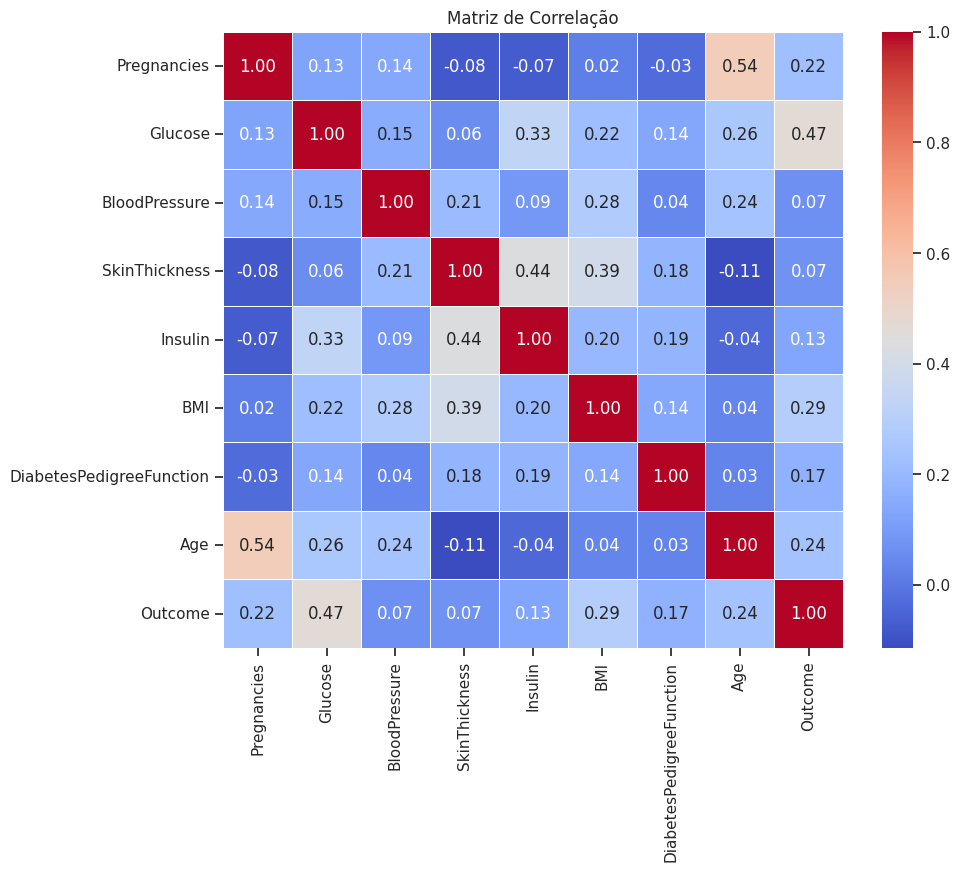

In [4]:
# Calcular a matriz de correlação
correlation_matrix = df.corr()

# Plotar mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

In [5]:
### Passo 3: Remoção de outliers

In [6]:
limit = 3

z_scores = stats.zscore(df['Pregnancies'])
outliers_p = df['Pregnancies'][abs(z_scores) > limit]
print(outliers_p)

z_scores = stats.zscore(df['Glucose'])
outliers_g = df['Glucose'][abs(z_scores) > limit]
print(outliers_g)

z_scores = stats.zscore(df['BloodPressure'])
outliers_b = df['BloodPressure'][abs(z_scores) > limit]
print(outliers_b)

# body mass index (18.5 - 24.9 [Obesity > 30])
z_scores = stats.zscore(df['BMI'])
outliers_bmi = df['BMI'][abs(z_scores) > limit]
print(outliers_bmi)

# Probability of diabetes based on family history
z_scores = stats.zscore(df['DiabetesPedigreeFunction'])
outliers_dpf = df['DiabetesPedigreeFunction'][abs(z_scores) > limit]
print(outliers_dpf)

z_scores = stats.zscore(df['Age'])
outliers_a = df['Age'][abs(z_scores) > limit]
print(outliers_a)


88     15
159    17
298    14
455    14
Name: Pregnancies, dtype: int64
75     0
182    0
342    0
349    0
502    0
Name: Glucose, dtype: int64
7      0
15     0
49     0
60     0
78     0
81     0
172    0
193    0
222    0
261    0
266    0
269    0
300    0
332    0
336    0
347    0
357    0
426    0
430    0
435    0
453    0
468    0
484    0
494    0
522    0
533    0
535    0
589    0
601    0
604    0
619    0
643    0
697    0
703    0
706    0
Name: BloodPressure, dtype: int64
9       0.0
49      0.0
60      0.0
81      0.0
145     0.0
177    67.1
371     0.0
426     0.0
445    59.4
494     0.0
522     0.0
673    57.3
684     0.0
706     0.0
Name: BMI, dtype: float64
4      2.288
45     1.893
58     1.781
228    2.329
330    1.476
370    2.137
371    1.731
395    1.600
445    2.420
593    1.699
621    1.698
Name: DiabetesPedigreeFunction, dtype: float64
123    69
453    72
459    81
666    70
684    69
Name: Age, dtype: int64


In [7]:
unique_outliers = list(set(outliers_g.index) | set(outliers_b.index) | set([9,49,60,81,145,371,426,494,522,684,706]))
print(unique_outliers)
df.drop(unique_outliers, inplace=True)

[643, 261, 7, 9, 266, 522, 269, 15, 145, 533, 535, 426, 172, 300, 430, 684, 49, 435, 182, 697, 60, 703, 193, 706, 453, 75, 332, 589, 78, 336, 81, 468, 342, 601, 347, 604, 349, 222, 484, 357, 619, 494, 371, 502]


In [8]:
### Passo 4: Pre-processamento normalização dos dados

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Tamanho do conjunto de treino:", len(X_train))
print("Tamanho do conjunto de teste:", len(X_test))
print(y_train.value_counts(normalize=True) * 100)
print(y_test.value_counts(normalize=True) * 100)


scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

Tamanho do conjunto de treino: 579
Tamanho do conjunto de teste: 145
Outcome
0    65.630397
1    34.369603
Name: proportion, dtype: float64
Outcome
0    65.517241
1    34.482759
Name: proportion, dtype: float64


In [10]:
### Passo 5: treinamento e teste dos modelos

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

log_reg_model = LogisticRegression(class_weight='balanced')
dt_model = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=7)
knn_model = KNeighborsClassifier(n_neighbors=10)
svm = Pipeline([("linear_svc", LinearSVC(C=1))])

log_reg_model.fit(X_train_scaled, y_train)
dt_model.fit(X_train_scaled, y_train)
rf_classifier.fit(X_train_scaled, y_train)
knn_model.fit(X_train_scaled, y_train)
svm.fit(X_train_scaled, y_train)

y_pred_logreg = log_reg_model.predict(X_test_scaled)
y_pred_dt = dt_model.predict(X_test_scaled)
y_pred_rf = rf_classifier.predict(X_test_scaled)
y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_svm = svm.predict(X_test_scaled)

print("Classification Report Logistic Regression:\n")
print(classification_report(y_test, y_pred_logreg))
print("Classification Report Decision Tree:\n")
print(classification_report(y_test, y_pred_dt))
print("Classification Report Random Forest:\n")
print(classification_report(y_test, y_pred_rf))
print("Classification Report KNN:\n")
print(classification_report(y_test, y_pred_knn))
print("Classification Report SVM:\n")
print(classification_report(y_test, y_pred_svm))

Classification Report Logistic Regression:

              precision    recall  f1-score   support

           0       0.81      0.73      0.77        95
           1       0.57      0.68      0.62        50

    accuracy                           0.71       145
   macro avg       0.69      0.70      0.69       145
weighted avg       0.73      0.71      0.72       145

Classification Report Decision Tree:

              precision    recall  f1-score   support

           0       0.80      0.76      0.78        95
           1       0.58      0.64      0.61        50

    accuracy                           0.72       145
   macro avg       0.69      0.70      0.69       145
weighted avg       0.72      0.72      0.72       145

Classification Report Random Forest:

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        95
           1       0.62      0.62      0.62        50

    accuracy                           0.74       145
   macro

In [12]:
### Passo 6: Validação cruzada

In [13]:
from sklearn.model_selection import cross_val_score, KFold

k_fold = KFold(n_splits=10, shuffle=True)
log_result = cross_val_score(log_reg_model, X_scaled, y, cv  = k_fold)
dt_result = cross_val_score(dt_model, X_scaled, y, cv = k_fold)
rf_result = cross_val_score(rf_classifier, X_scaled, y, cv = k_fold)
knn_result = cross_val_score(knn_model, X_scaled, y, cv = k_fold)
svm_result = cross_val_score(svm, X_scaled, y, cv = k_fold)

  # Creates a dictionary to store Linear Models.
dic_models = {
    "LOG": log_result.mean(),
    "DT": dt_result.mean(),
    "RF": rf_result.mean(),
    "KNN": knn_result.mean(),
    "SVM": svm_result.mean(),
}
# Select the best model.
best_model = max(dic_models, key=dic_models.get)

print("Logistic Regression (R^2): {0}\nDecision Tree (R^2): {1}\nRandom Forest (R^2): {2}\nKNN (R^2): {3}\nSVM R(^2): {4}".format(log_result.mean(), dt_result.mean(), rf_result.mean(), knn_result.mean(), svm_result.mean()))
print("O melhor modelo é : {0} com o valor: {1}".format(best_model, dic_models[best_model]))

Logistic Regression (R^2): 0.7528538812785388
Decision Tree (R^2): 0.6767503805175038
Random Forest (R^2): 0.7652016742770168
KNN (R^2): 0.7430175038051752
SVM R(^2): 0.7720129375951295
O melhor modelo é : SVM com o valor: 0.7720129375951295


In [14]:
### Passo 7: Interpretação dos resultados

In [15]:
import shap

def predict_fn(data):
    return knn_model.predict(data)

shap.initjs()
knn_explainer = shap.KernelExplainer(predict_fn, shap.utils.sample(X_test_scaled, 10))
knn_shap_values = knn_explainer.shap_values(X_test_scaled)

shap.plots.force(knn_explainer.expected_value, knn_shap_values[10])

  0%|          | 0/145 [00:00<?, ?it/s]